# Tarea final: Modelando datos con Pandas y ajuste de curvas

#### Realizado por:
+ María Fernanda Carvajal Guerrero - 2200804
+ Karen Sarat Anaya Verdugo - 2200813
+ Carlos Santiago Rodríguez Sarmiento - 2200799

#### Universidad Industrial de Santander - 2021

Pandas es una librería de Python especializada en el manejo y análisis de estructuras de datos.
Las principales características de esta librería son:

+ Define nuevas estructuras de datos basadas en los arrays de la librería NumPy pero con nuevas funcionalidades.
+ Permite leer y escribir fácilmente ficheros en formato CSV, Excel y bases de datos SQL.
* Permite acceder a los datos mediante índices o nombres para filas y columnas.
* Ofrece métodos para reordenar, dividir y combinar conjuntos de datos.
* Permite trabajar con series temporales.
* Realiza todas estas operaciones de manera muy eficiente.

#### 0. Importar librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sci
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

#### 1. Lectura de los archivos de datos

In [2]:
data_1 = pd.read_csv("Global_active_power.csv",delimiter=",")
data_2 = pd.read_csv("Global_intensity.csv",delimiter=",")
data_3 = pd.read_csv("Global_reactive_power.csv",delimiter=",")
data_4 = pd.read_csv("Voltage.csv",delimiter=",")

#### 2. Concatenar los datos en un único archivo
Utilizando *merge* se realiza la concatenación de los datos en un único archivo y se guarda en la carpeta de trabajo.

In [3]:
data_12 = pd.merge(data_1,data_2)
data_34 = pd.merge(data_3,data_4)
dataFinal = pd.merge(data_12,data_34)

In [4]:
dataFinal

,Datetime,Global_active_power,Global_intensity,Global_reactive_power,Voltage
0,2010-01-01 00:00:00,1.790,7.4,0.236,240.65
1,2010-01-01 00:01:00,1.780,7.4,0.234,240.07
2,2010-01-01 00:02:00,1.780,7.4,0.234,240.15
3,2010-01-01 00:03:00,1.746,7.2,0.186,240.26
4,2010-01-01 00:04:00,1.686,7.0,0.102,240.12
...,...,...,...,...,...
457390,2010-11-26 20:58:00,0.946,4.0,0.000,240.43
457391,2010-11-26 20:59:00,0.944,4.0,0.000,240.00
457392,2010-11-26 21:00:00,0.938,3.8,0.000,239.82
457393,2010-11-26 21:01:00,0.934,3.8,0.000,239.70


#### 3. Guardar el nuevo archivo de datos

In [5]:
dataFinal.to_csv('data.csv')

Se lee el archivo de datos y se establece el index a partir del cual se realiza el resample. Este index está dado por la columna DateTime

In [6]:
data = pd.read_csv('data.csv', parse_dates=['Datetime'], index_col=['Datetime'])
data

,Unnamed: 0,Global_active_power,Global_intensity,Global_reactive_power,Voltage
Datetime,,,,,
2010-01-01 00:00:00,0,1.790,7.4,0.236,240.65
2010-01-01 00:01:00,1,1.780,7.4,0.234,240.07
2010-01-01 00:02:00,2,1.780,7.4,0.234,240.15
2010-01-01 00:03:00,3,1.746,7.2,0.186,240.26
2010-01-01 00:04:00,4,1.686,7.0,0.102,240.12
...,...,...,...,...,...
2010-11-26 20:58:00,457390,0.946,4.0,0.000,240.43
2010-11-26 20:59:00,457391,0.944,4.0,0.000,240.00
2010-11-26 21:00:00,457392,0.938,3.8,0.000,239.82


#### 4. Se realiza el *resample* de los datos
Se realiza el reorganizado de datos a partir de los promedios diarios y mensuales

In [7]:
# Reorganizado por días
data_days = data.resample('D').mean()
data_days

,Unnamed: 0,Global_active_power,Global_intensity,Global_reactive_power,Voltage
Datetime,,,,,
2010-01-01,719.5,0.850175,3.537083,0.114817,242.565722
2010-01-02,42229.5,1.176235,4.857778,0.086656,243.631743
2010-01-03,82547.5,0.901894,3.757778,0.090331,241.822778
2010-01-04,125160.5,1.171833,4.879028,0.100322,241.754160
2010-01-05,168359.5,0.916776,3.929861,0.133697,240.647167
...,...,...,...,...,...
2010-12-07,272036.5,0.770538,3.397222,0.198550,240.218646
2010-12-08,316675.5,0.367846,1.623750,0.117429,240.794931
2010-12-09,354089.5,1.119508,4.755694,0.139832,241.619722


In [8]:
# Reorganizado por meses
data_month = data.resample('M').mean()
data_month

,Unnamed: 0,Global_active_power,Global_intensity,Global_reactive_power,Voltage
Datetime,,,,,
2010-01-31,100170.129182,1.300640,5.430332,0.125182,242.338522
2010-02-28,128339.585175,1.157539,4.836624,0.109467,242.002101
2010-03-31,151173.561849,1.170015,4.920399,0.136368,241.475284
2010-04-30,177796.948276,1.036334,4.363496,0.129557,241.442527
2010-05-31,205370.206741,1.075957,4.551504,0.127221,241.296151
2010-06-30,233408.971551,0.975306,4.170282,0.145525,240.888985
2010-07-31,262055.585639,0.778947,3.337202,0.138093,240.965167
2010-08-31,280754.886724,0.929452,3.954423,0.130815,241.422944
2010-09-30,303424.528462,0.997541,4.223837,0.127700,241.267517


Así mismo, se eliminan las filas con datos vacíos para evitar errores en las funciones de ajuste

In [10]:
data_days = data_days.dropna()

#### 5. Funciones necesarias para establecer relaciones

In [11]:
#Proporciona el error.
def get_fit(func,xdata,ydata,r):
    popt, pcov = curve_fit(func, xdata, ydata)
    popt, pcov = np.around(popt,r), np.around(np.sqrt(np.diag(pcov)),r)
    E=np.sqrt(np.mean((ydata-func(xdata, *popt))**2))
    print("Coeficients are : {}".format(popt))
    print("Sigma_Coeficients are : {}".format(pcov))
    print("Error on fit is ={}".format(E))
    return #popt, np.sqrt(np.diag(pcov))

In [38]:
def lineal(x, a, b):
    return a*x+b
def rel3(X, a, b, c):  
    x,y = X
    return(a*x+b*y+c)

## RELACIÓN 1: Global active power = A1(Global intensity) + B1

Se obtienen los parámetros de ajuste para la relación entre la intensidad global y la potencia global activa utilizando *curvefit*

In [13]:
#Relación por días
popt_days, pcov_days = curve_fit(lineal, data_days["Global_intensity"],data_days["Global_active_power"])
#Relación por minutos
popt1, pcov1 = curve_fit(lineal, data["Global_intensity"],data["Global_active_power"])
#Relación por meses
popt_month, pcov_month = curve_fit(lineal, data_month["Global_intensity"],data_month["Global_active_power"])

Se grafican las relaciones para los diferentes *samples* de los datos para definir la mejor relación para los mismos

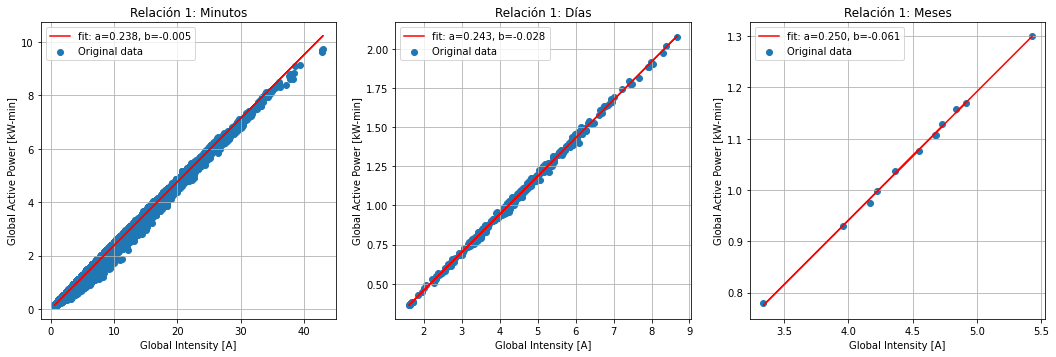

In [14]:
plt.figure(figsize=(18,12))
ax1 = plt.subplot(231)
plt.plot(data["Global_intensity"], lineal(data["Global_intensity"], *popt1), 'r-',label='fit: a=%5.3f, b=%5.3f' % tuple(popt1))
plt.scatter(data["Global_intensity"],data["Global_active_power"],label="Original data")
ax1.title.set_text('Relación 1: Minutos')
ax1.set_xlabel('Global Intensity [A]')
ax1.set_ylabel('Global Active Power [kW-min]')
plt.legend()
plt.grid()
ax2 = plt.subplot(232)
plt.plot(data_days["Global_intensity"], lineal(data_days["Global_intensity"], *popt_days), 'r-',label='fit: a=%5.3f, b=%5.3f' % tuple(popt_days))
plt.scatter(data_days["Global_intensity"],data_days["Global_active_power"],label="Original data")
ax2.title.set_text('Relación 1: Días')
ax2.set_xlabel('Global Intensity [A]')
ax2.set_ylabel('Global Active Power [kW-min]')
plt.legend()
plt.grid()
ax3 = plt.subplot(233)
plt.plot(data_month["Global_intensity"], lineal(data_month["Global_intensity"], *popt_month), 'r-',label='fit: a=%5.3f, b=%5.3f' % tuple(popt_month))
plt.scatter(data_month["Global_intensity"],data_month["Global_active_power"],label="Original data")
ax3.title.set_text('Relación 1: Meses')
ax3.set_xlabel('Global Intensity [A]')
ax3.set_ylabel('Global Active Power [kW-min]')
plt.legend()
plt.grid()
plt.show()

Se encuentras los coeficientes y el error en el ajuste para cada una de las gráficas

In [15]:
print("Para el análisis por minutos:")
get_fit(lineal,data["Global_intensity"],data["Global_active_power"],5)

Para el análisis por minutos:
Coeficients are : [ 0.23803 -0.00498]
Sigma_Coeficients are : [2.0e-05 1.1e-04]
Error on fit is =0.04925499917861274


In [16]:
print("Para el análisis por días:")
get_fit(lineal,data_days["Global_intensity"],data_days["Global_active_power"],5)

Para el análisis por días:
Coeficients are : [ 0.24306 -0.02753]
Sigma_Coeficients are : [0.0006  0.00282]
Error on fit is =0.01522473707218765


In [17]:
print("Para el análisis por meses:")
get_fit(lineal,data_month["Global_intensity"],data_month["Global_active_power"],5)

Para el análisis por meses:
Coeficients are : [ 0.25043 -0.06067]
Sigma_Coeficients are : [0.00256 0.01155]
Error on fit is =0.004125592659373042


## RELACIÓN 2: Global active power = A2(Voltaje) + B2

Se obtienen nuevamente los parámetros de ajuste, pero esta vez para la relación entre la intensidad global y el voltaje utilizando curvefit.

In [18]:
#Ajuste para todos los datos.
popt2, pcov2 = curve_fit(lineal, data["Voltage"], data["Global_active_power"])
popt2


array([-0.13586092, 33.8735242 ])

In [19]:
#Ajuste para los promedios por meses.
popt_month2, pcov_month2 = curve_fit(lineal, data_month["Voltage"], data_month["Global_active_power"])
popt_month2

array([  0.17281052, -40.67097826])

In [20]:
#.dropna() elimina las filas con datos vacíos para evitar errores en las funciones de ajuste.

data_days2 = data_days.dropna()


In [21]:
#Ajusta para los promedios por días.
popt_days2, pcov_days2 = curve_fit(lineal, data_days["Voltage"], data_days["Global_active_power"])
popt_days2

array([ 0.0296603 , -6.10166907])

Se grafican las relaciones para los diferentes samples de los datos para definir la mejor relación para los datos.


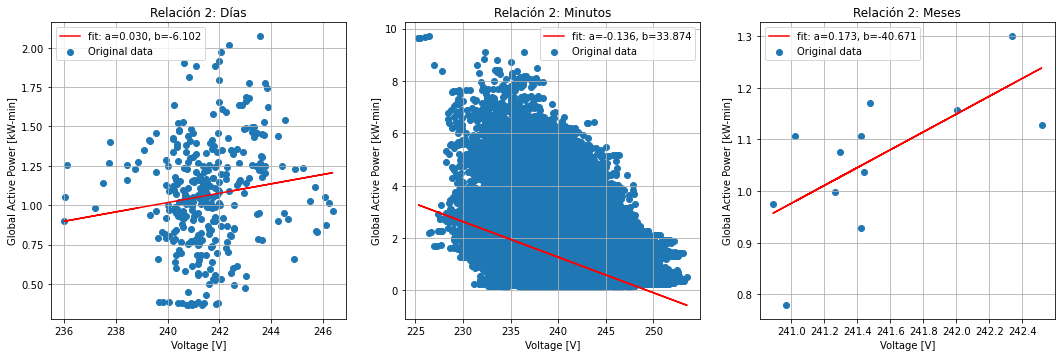

In [22]:
plt.figure(figsize=(18,12))
ax1= plt.subplot(231) #plt.subplot crea una 
#figura y uno (o varios) conjunto de ejes, devolviendo una referencia a la figura y a los ejes.
plt.plot(data_days["Voltage"], lineal(data_days["Voltage"], *popt_days2), 'r-',label='fit: a=%5.3f, b=%5.3f' % tuple(popt_days2))
plt.scatter(data_days["Voltage"], data_days["Global_active_power"],label="Original data")
ax1.title.set_text('Relación 2: Días')
ax1.set_xlabel('Voltage [V]')
ax1.set_ylabel('Global Active Power [kW-min]')
plt.legend()
plt.grid()
ax2=plt.subplot(232)
plt.plot(data["Voltage"], lineal(data["Voltage"], *popt2), 'r-',label='fit: a=%5.3f, b=%5.3f' % tuple(popt2))
plt.scatter(data["Voltage"], data["Global_active_power"], label="Original data")
ax2.title.set_text('Relación 2: Minutos')
ax2.set_xlabel('Voltage [V]')
ax2.set_ylabel('Global Active Power [kW-min]')
plt.legend()
plt.grid()
ax3=plt.subplot(233)
plt.plot(data_month["Voltage"], lineal(data_month["Voltage"], *popt_month2), 'r-',label='fit: a=%5.3f, b=%5.3f' % tuple(popt_month2))
plt.scatter(data_month["Voltage"],data_month["Global_active_power"],label="Original data")
ax3.title.set_text('Relación 2: Meses')
ax3.set_xlabel('Voltage [V]')
ax3.set_ylabel('Global Active Power [kW-min]')
plt.legend()
plt.grid()
plt.show()

Se encuentras los coeficientes y el error en el ajuste para cada una de las gráficas.

In [23]:
#Por días.
print("Para el análisis por días:")
get_fit(lineal,data_days["Voltage"],data_days["Global_active_power"],5)

Para el análisis por días:
Coeficients are : [ 0.02966 -6.10167]
Sigma_Coeficients are : [0.01238 2.98937]
Error on fit is =0.34128270560969715


In [24]:
#Por meses.
print("Para el análisis por meses:")
get_fit(lineal, data_month["Voltage"],data_month["Global_active_power"],5)

Para el análisis por meses:
Coeficients are : [  0.17281 -40.67098]
Sigma_Coeficients are : [ 0.05995 14.47825]
Error on fit is =0.09452207454773963


In [25]:
#Todos los datos.
print("Para el análisis de todos los datos:")
get_fit(lineal, data["Voltage"], data["Global_active_power"],5)

Para el análisis de todos los datos:
Coeficients are : [-0.13586 33.87352]
Sigma_Coeficients are : [0.00044 0.10632]
Error on fit is =0.848793541593315


## RELACIÓN 3: Global active power = A31(Global intensity) + A32(Voltaje) + B3

 Para esta relación es necesario tener en cuenta que se toman dos variables, por lo tanto la gráfica de ajuste y la distribución de puntos estará en R3.

In [27]:
popt_month_3, pcov_month_3 = curve_fit(rel3, (data_month["Global_intensity"], data_month["Voltage"]),data_month["Global_active_power"])
days_popt_3, days_pcov_3 = curve_fit(rel3, (data_days["Global_intensity"], data_days["Voltage"]),data_days["Global_active_power"])
popt_3, pcov_3 = curve_fit(rel3, (data["Global_intensity"], data["Voltage"]),data["Global_active_power"])


array([ 0.24524991,  0.00808133, -1.98910306])

Ahora, como se trata de una regresión en R3, es necesario fijar los valores del meshgrid que ajustará cada set de datos a partir de una malla que relaciona las variables independientes con la dependiente.

In [40]:
#Valores del meshgrid que tendrá el ajuste
month_Global_intensity = [np.min(data_month["Global_intensity"]),np.max(data_month["Global_intensity"]),len(data_month["Global_intensity"])]
month_Voltage = [np.min(data_month["Voltage"]),np.max(data_month["Voltage"]),len(data_month["Voltage"])]

days_Global_intensity = [np.min(data_days["Global_intensity"]),np.max(data_days["Global_intensity"]),300]
days_Voltage = [np.min(data_days["Voltage"]),np.max(data_days["Voltage"]),300]

Global_intensity = [np.min(data["Global_intensity"]),np.max(data["Global_intensity"]),12]
Voltage = [np.min(data["Voltage"]),np.max(data["Voltage"]),12]

Procederemos a graficar cada set de datos junto con su ajuste. Igualmente se añade los valores de sus parámetros y los errores obtenidos de la regresión para saber que tan exacta fue la relación.

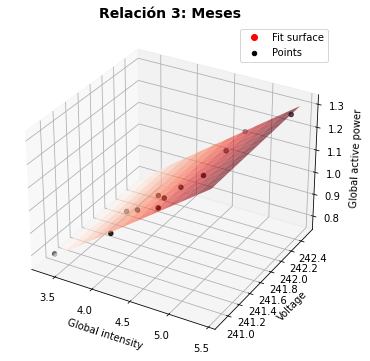

Coeficients are : [ 0.24525  0.00808 -1.9891 ]
Sigma_Coeficients are : [0.00241 0.00247 0.58942]
Error on fit is =0.002806007767506809


In [39]:
plt.figure(figsize=(8,6))
ax=plt.axes(projection='3d')
x=np.linspace(*month_Global_intensity)
y=np.linspace(*month_Voltage)             
xx, yy =np.meshgrid(x,y)
z= rel3((xx,yy),*popt_month_3)          #Ajuste de los datos para cuando es medido en meses
scatter = ax.scatter3D(data_month["Global_intensity"],data_month["Voltage"],data_month["Global_active_power"],color = 'black')
ax.plot_surface(xx,yy,z,alpha= 0.6,cmap='Reds') #Comando para gráficar una superficie (Regresión en R3)
ax.set_title("Relación 3: Meses",fontsize=14,fontweight="bold")
ax.set_xlabel("Global intensity")
ax.set_ylabel("Voltage")
ax.set_zlabel("Global active power")
legends = mpl.lines.Line2D([0],[0], linestyle="none", color='r', marker = 'o') 
ax.legend([legends,scatter], ['Fit surface','Points'], numpoints = 1)
plt.show()
#Ahora obtenemos los datos de error y los parámetros de la regresión
get_fit(rel3,(data_month["Global_intensity"], data_month["Voltage"]),data_month["Global_active_power"],5)

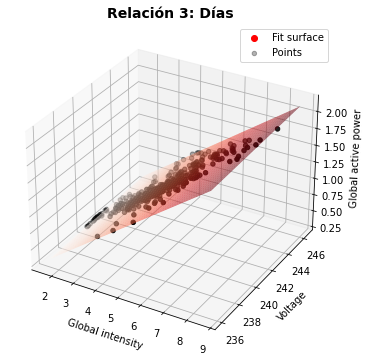

Coeficients are : [ 0.24235  0.00617 -1.51527]
Sigma_Coeficients are : [0.00047 0.00044 0.10512]
Error on fit is =0.011960661200757176


In [36]:
plt.figure(figsize=(8,6))
ax=plt.axes(projection='3d')
x2=np.linspace(*days_Global_intensity)
y2=np.linspace(*days_Voltage)
xx2, yy2 =np.meshgrid(x2,y2)
z2= rel3((xx2,yy2),*days_popt_3)
ax.scatter3D(data_days["Global_intensity"],data_days["Voltage"],data_days["Global_active_power"],color = 'black')
ax.plot_surface(xx2,yy2,z2,alpha= 0.6,cmap='Reds')
ax.set_title("Relación 3: Días",fontsize=14,fontweight="bold")
ax.set_xlabel("Global intensity")
ax.set_ylabel("Voltage")
ax.set_zlabel("Global active power")
legends = mpl.lines.Line2D([0],[0], linestyle="none", color='r', marker = 'o')
ax.legend([legends,scatter], ['Fit surface','Points'], numpoints = 1)
plt.show()
get_fit(rel3,(data_days["Global_intensity"], data_days["Voltage"]),data_days["Global_active_power"],5)

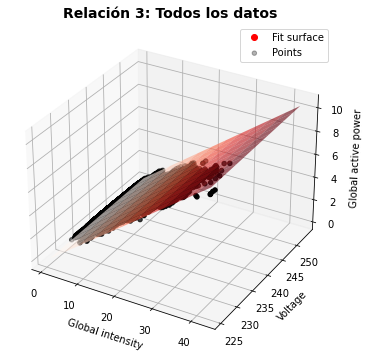

Coeficients are : [ 0.23948  0.00467 -1.13919]
Sigma_Coeficients are : [2.00e-05 3.00e-05 6.66e-03]
Error on fit is =0.04776226287364098


In [37]:
plt.figure(figsize=(8,6))
ax=plt.axes(projection='3d')
x1=np.linspace(*Global_intensity)
y1=np.linspace(*Voltage)
xx1, yy1 =np.meshgrid(x1,y1)
z1= rel3((xx1,yy1),*popt_3)
ax.scatter3D(data["Global_intensity"],data["Voltage"],data["Global_active_power"], color = 'black')
ax.plot_surface(xx1,yy1,z1,alpha= 0.6,cmap='Reds')
ax.set_title("Relación 3: Todos los datos",fontsize=14,fontweight="bold")
ax.set_xlabel("Global intensity")
ax.set_ylabel("Voltage")
ax.set_zlabel("Global active power")
legends = mpl.lines.Line2D([0],[0], linestyle="none", color='r', marker = 'o')
ax.legend([legends,scatter], ['Fit surface','Points'], numpoints = 1)
plt.show()
get_fit(rel3,(data["Global_intensity"], data["Voltage"]),data["Global_active_power"],5)

### Conclusiones:

Se presentan a continuación los errores en los ajustes para cada relación y los diferentes *samples*:

|            | Minutos | Días  | Meses |
|------------|---------|-------|-------|
| Relación 1 | 0.049   | 0.015 | 0.004 |
| Relación 2 | 0.848   | 0.341 | 0.094 |
| Relación 3 | 0.047   | 0.012 | 0.003 |

A partir de esto se puede concluir que:
+ La mejor relación es la número 3, que realiza una correspondencia entre el voltaje y la intensidad global como factores de los cuales depende la potencia global activa. Esta relación se encuentra denido a que tiene el menor error de ajuste a la función establecida.
+ No obstante lo anterior, la relación 1 también posee errores de ajustes muy bajos por lo que se considera una buena relación, aun cuando no fue la mejor
+ La peor relación es la establecida entre el voltaje y la potencia global activa, teniendo por mucho, los errores de ajuste más grandes.
+ Así mismo, cabe resaltar que el resample con menores valores de error en el ajustes son aquellos realizados por meses, por lo que los promedios de los datos brindados inicialmente son los que mejor se ajustan a las relaciones lineales establecidas.